### WHAT IS ASKED?

In [ ]:
# CMAPSS : Commercial Modular Aero-Propulsion System Simulation dataset will be used
# Each data set is divided into a train and a test set
# Each time-series data set is a data set obtained from another engine
# A dataset is data from the same type of engine
# The four data sets are multivariate time-series data obtained with different operational conditions (ONE, SIX)    and fault modes (ONE, TWO), respectively.
# There are three operational settings that affect engine performance
# For each test data, RUL (Remaining Useful Life) values are provided
# In the training set, the degradation increases until it reaches the predefined threshold, which is deemed bad for operating the engine
# In the test set, the time series data is terminated before it is completely degraded
# For each data set, there is a column of 26 sensors.
# For this project, use all the four train and test sets.
# 1.	The user must be able to send sensor data during the operation of the asset and get an estimate of the remaining useful life
# 2.	The user must be able to specify the training set to be used to train the model.  By default, this should include the entire training set.
# 3.    In addition to this default behavior, the user must be able to specify specific assets to train on by providing unique identifiers for the assets.
# 4.	The user must be able to specify the training set to be used to train the model.  By default, this should include the entire training set.
# From the technical point of view, we will setup a web app to serve ML models learned from the CMAPSS dataset, as shown in the figure
# 1.	The models must be built using all the four training datasets
# 2.	The models must be served using a Flask-based Web app.  It can be stood up locally for this project.
# 3.	The client application must be able to send sensor data to receive the RUL prediction.

### Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Importing Data

In [17]:
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv(('train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv(('test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv(('RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

train1 = pd.read_csv(('train_FD002.txt'), sep='\s+', header=None, names=col_names)
test1 = pd.read_csv(('test_FD002.txt'), sep='\s+', header=None, names=col_names)
y_test1 = pd.read_csv(('RUL_FD002.txt'), sep='\s+', header=None, names=['RUL'])

train2 = pd.read_csv(('train_FD003.txt'), sep='\s+', header=None, names=col_names)
test2 = pd.read_csv(('test_FD003.txt'), sep='\s+', header=None, names=col_names)
y_test2 = pd.read_csv(('RUL_FD003.txt'), sep='\s+', header=None, names=['RUL'])

train3 = pd.read_csv(('train_FD004.txt'), sep='\s+', header=None, names=col_names)
test3 = pd.read_csv(('test_FD004.txt'), sep='\s+', header=None, names=col_names)
y_test3 = pd.read_csv(('RUL_FD004.txt'), sep='\s+', header=None, names=['RUL'])

# Merging data
default_train = pd.concat([train, train1, train2, train3], ignore_index=True)
default_test = pd.concat([test, test1, test2, test3], ignore_index=True)
default_y_test = pd.concat([y_test, y_test1, y_test2, y_test3], ignore_index=True)

train_set = user_choice



# Merging the data for 
# inspect first few rows
train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [18]:
df_info = pd.concat ( [train.isna().sum() , test.nunique()] , axis = 1  )
df_info.columns = ['missing value' , 'number unique value']
df_info

,missing value,number unique value
unit_nr,0,100
time_cycles,0,303
setting_1,0,150
setting_2,0,14
setting_3,0,1
s_1,0,1
s_2,0,262
s_3,0,2361
s_4,0,2954
s_5,0,1


In [19]:

train[index_names].describe()
train[index_names].groupby('unit_nr').max().describe()

,time_cycles
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


In [20]:

train[setting_names].describe()

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [21]:

train[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


Data Preprocessing

In [22]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle 
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


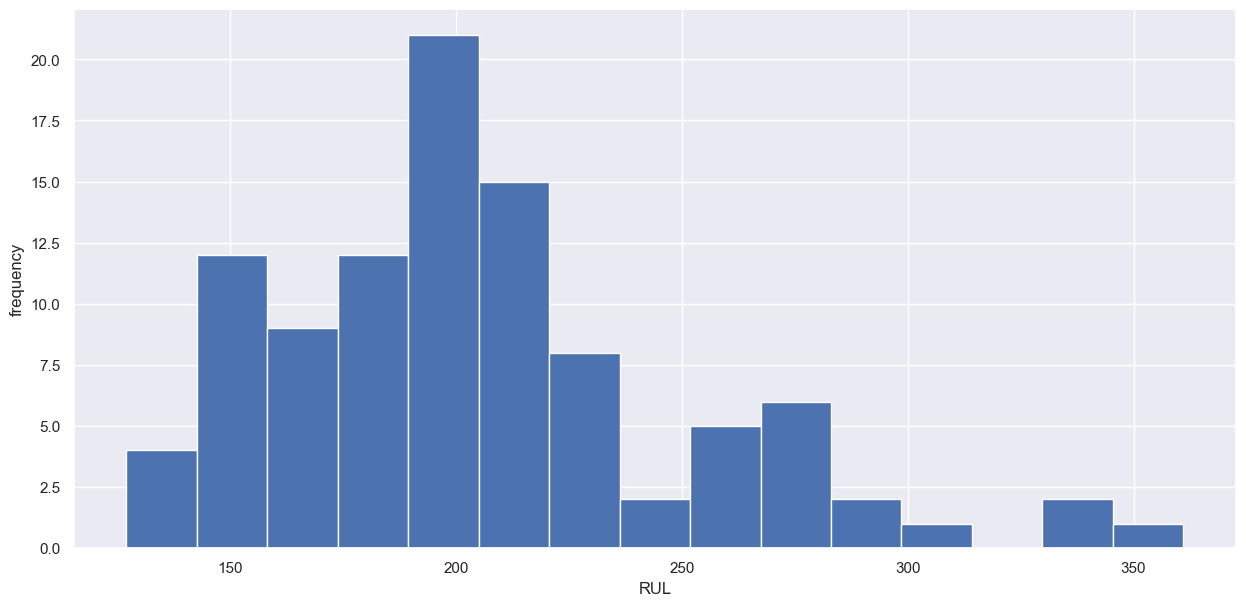

In [23]:

df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()


### Basic EDA

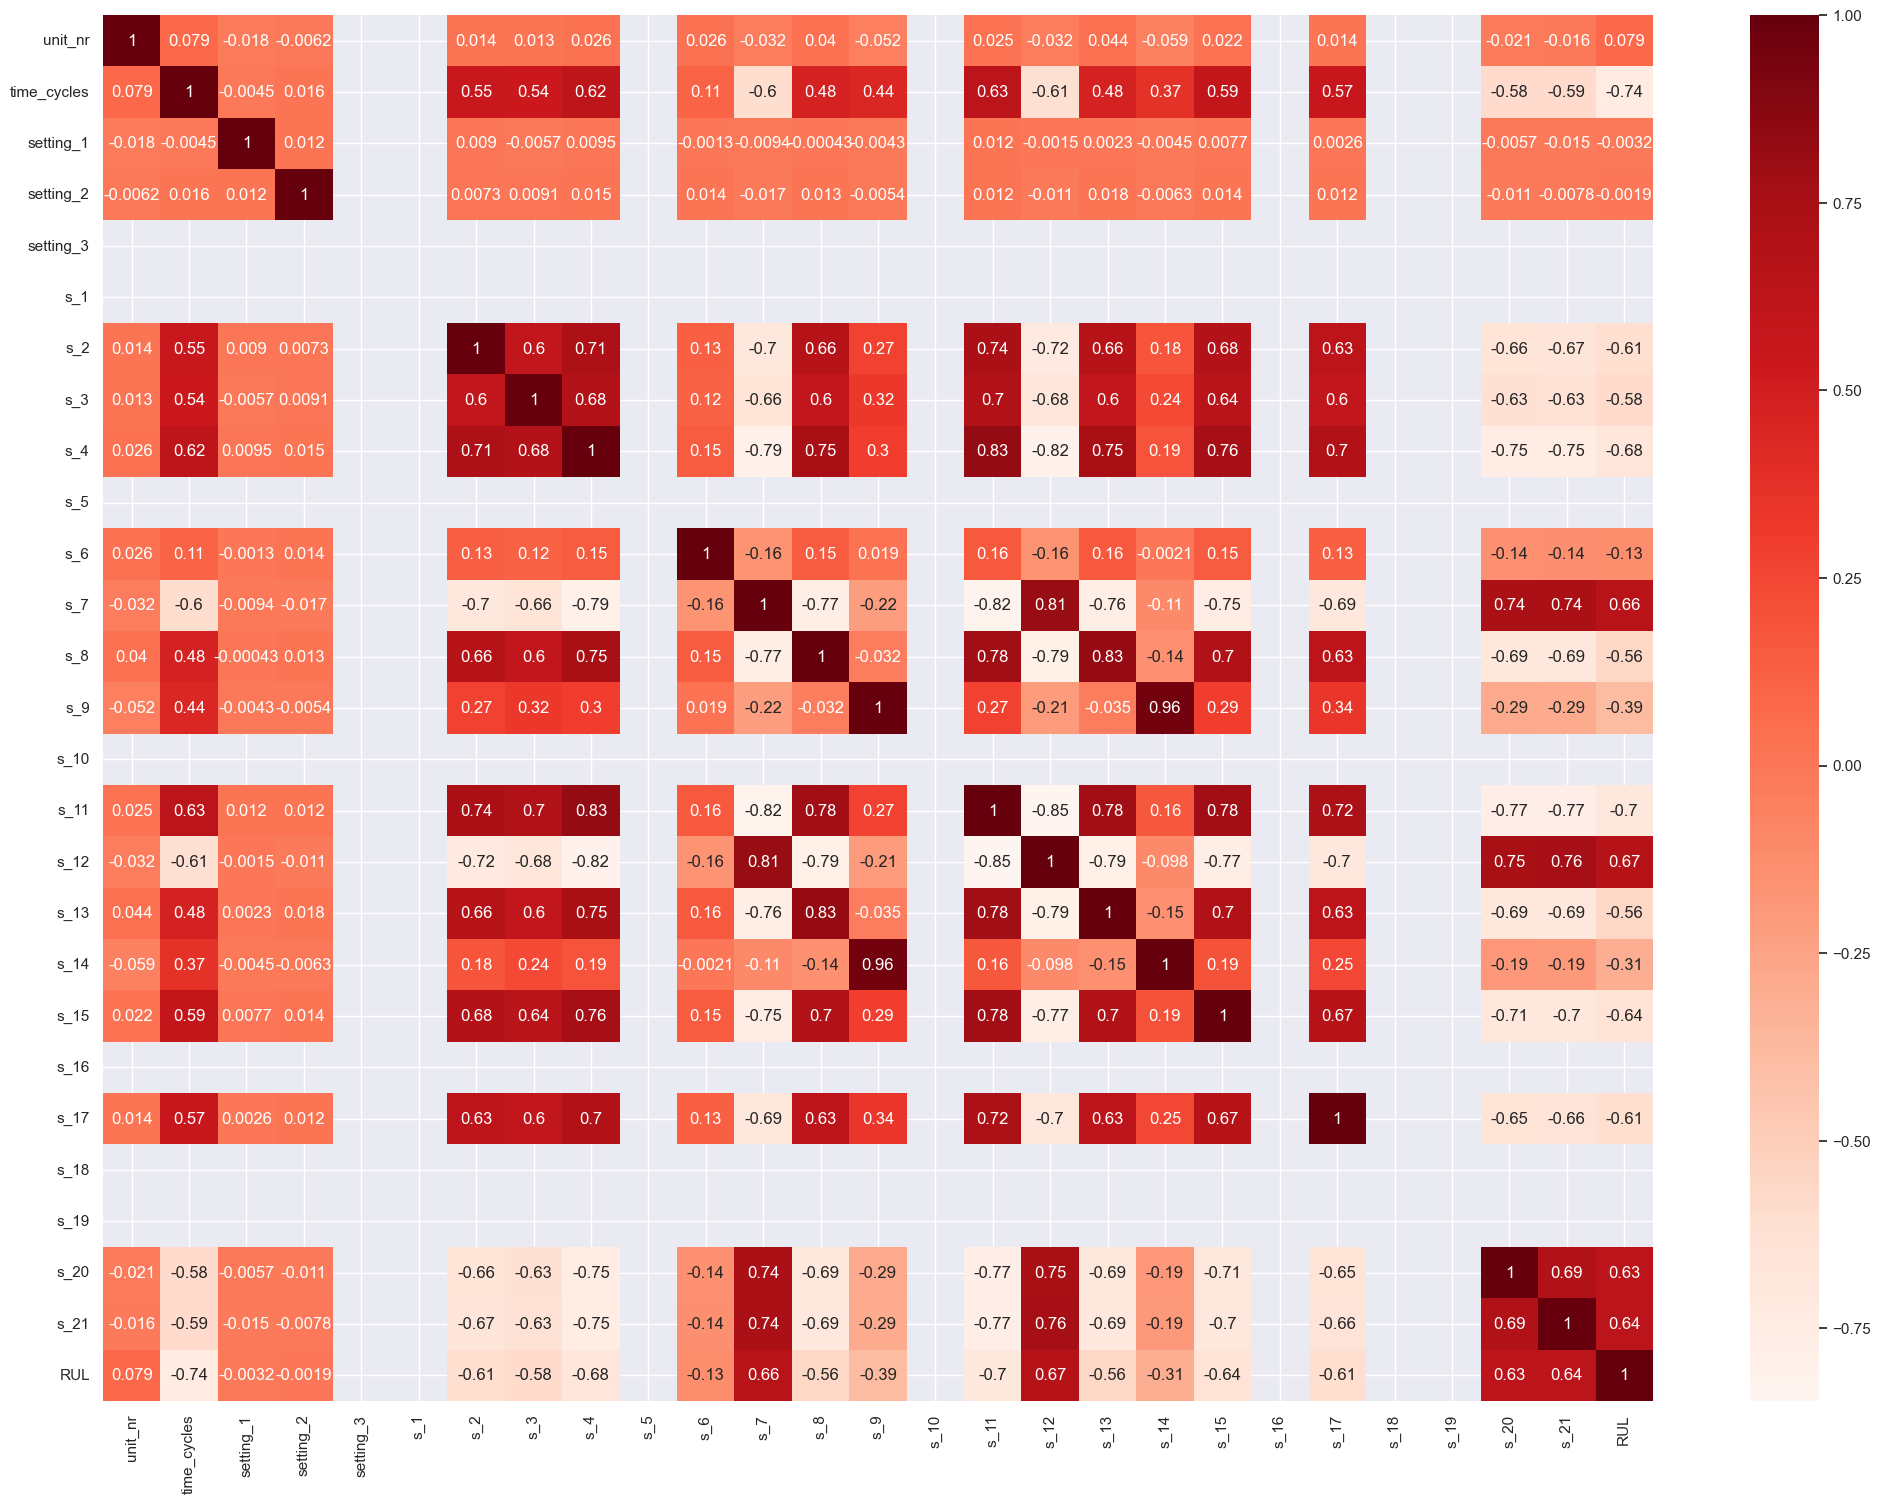

In [24]:
plt.figure(figsize=(25,18))
sns.heatmap(train.corr(),annot=True ,cmap='Reds')
plt.show()

In [25]:
# Many sensors are correlated with RUL Feature

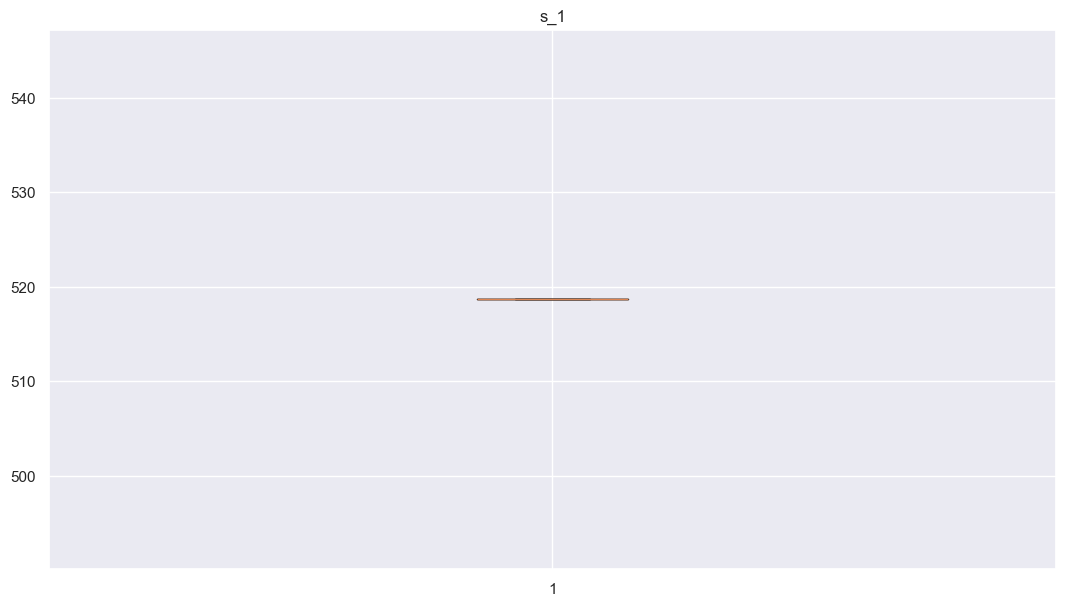

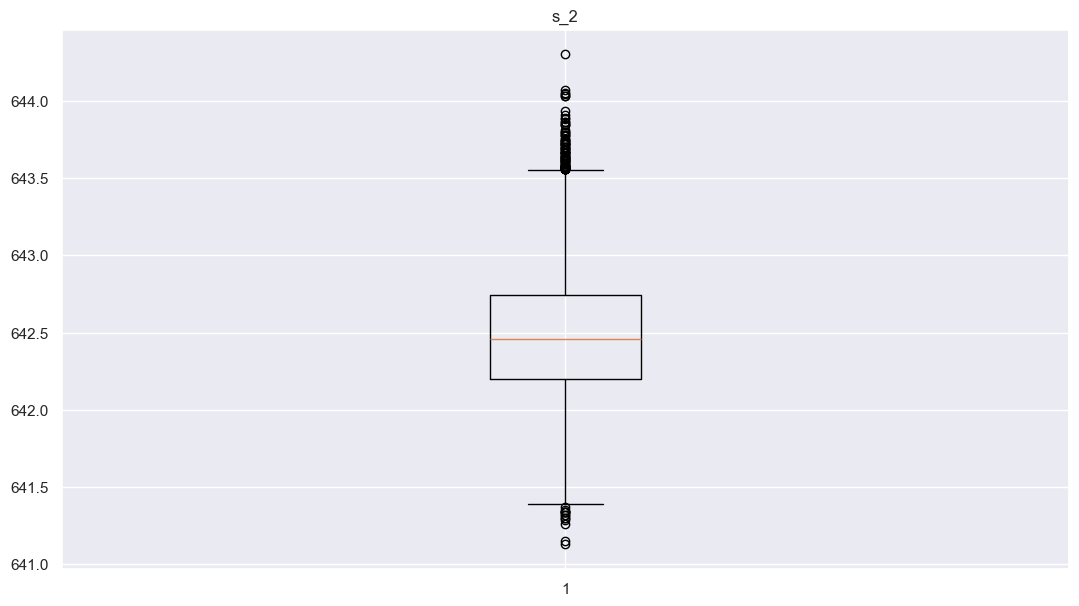

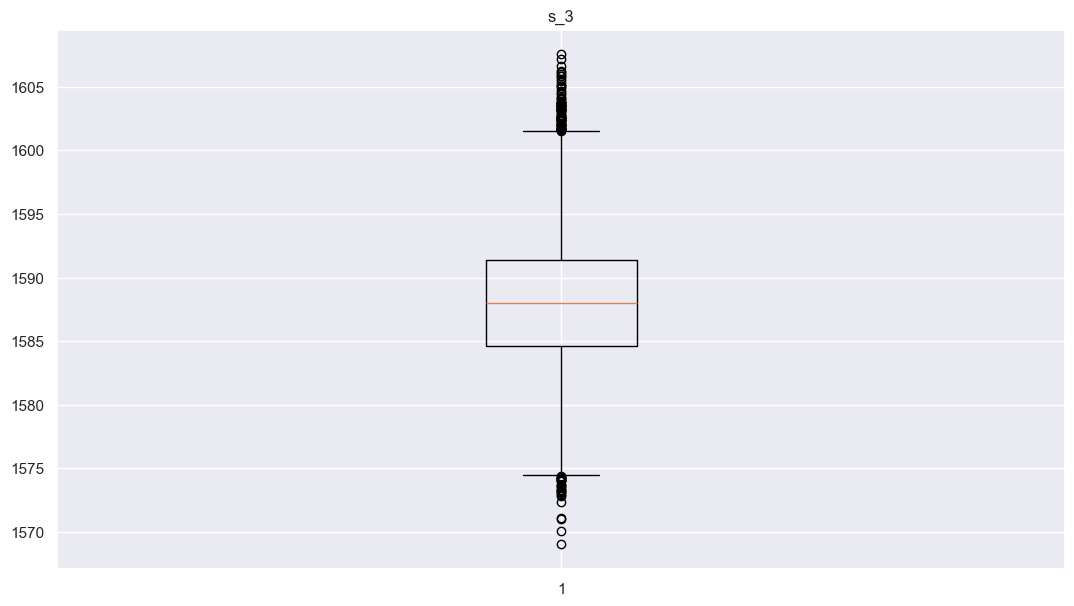

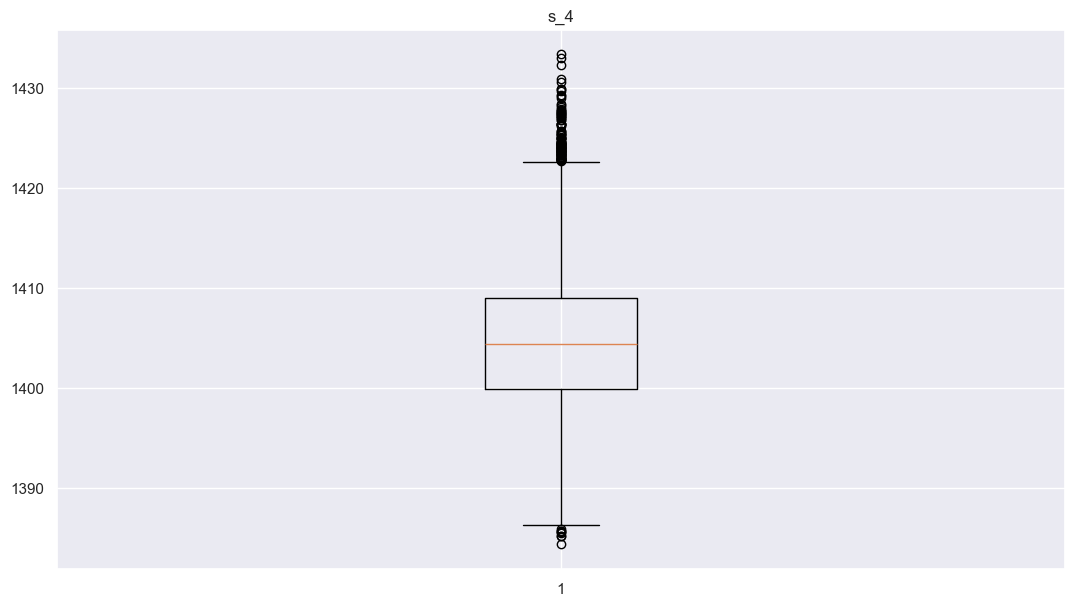

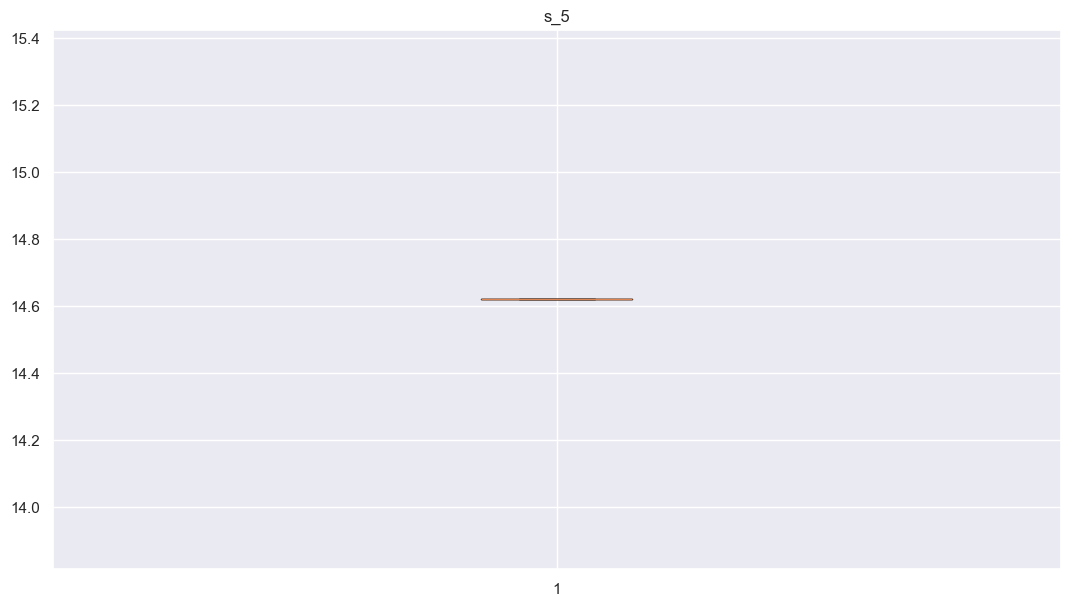

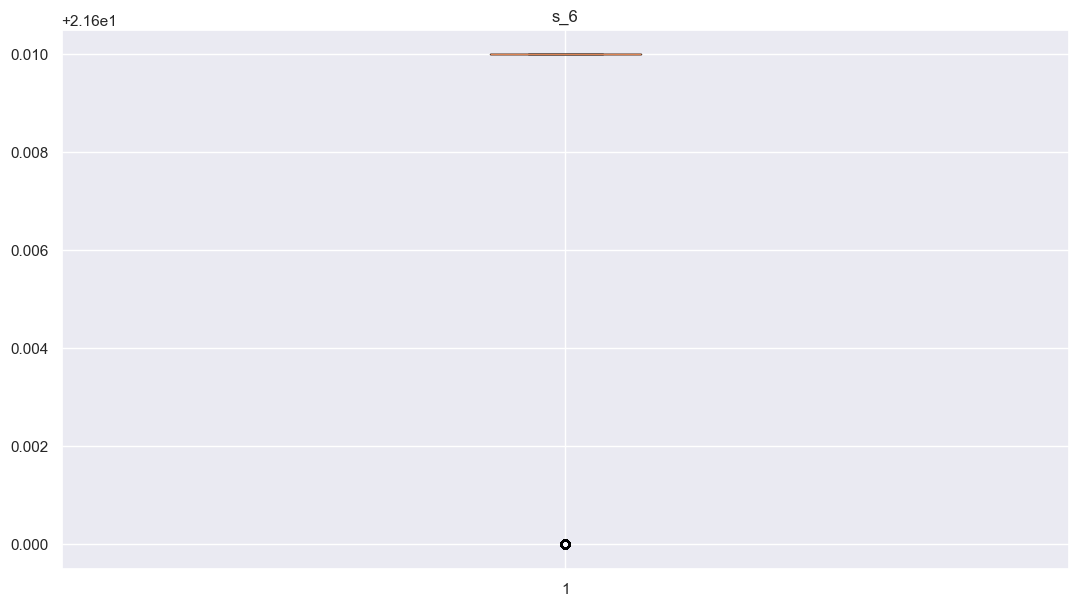

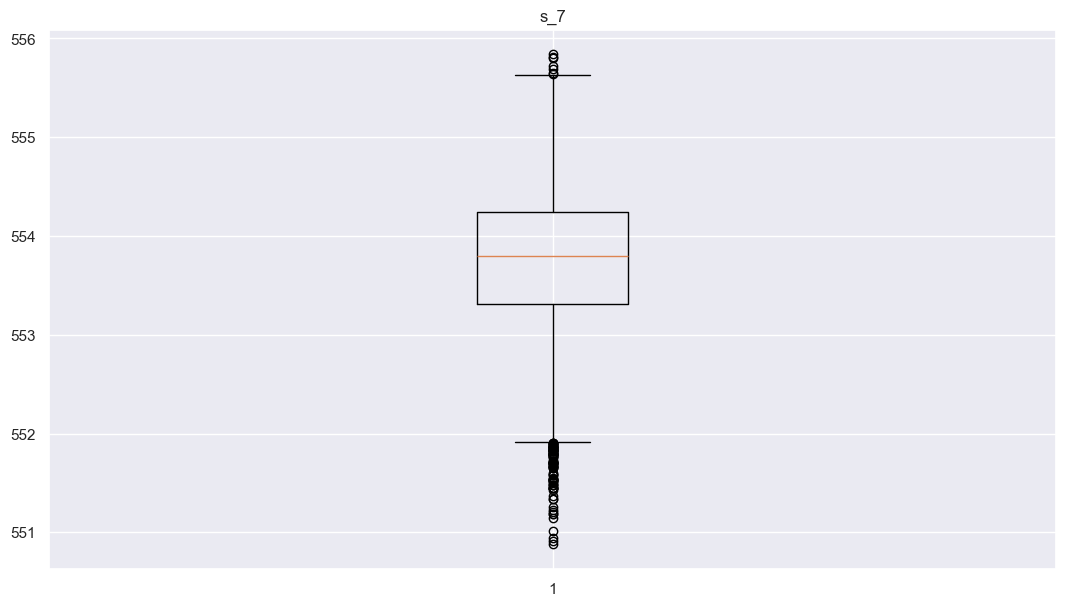

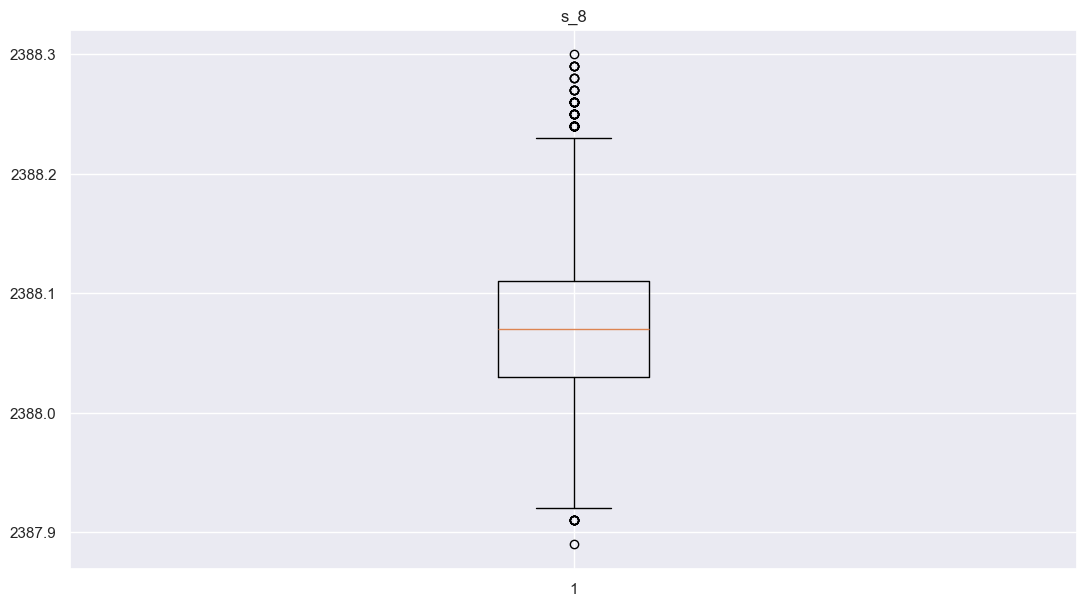

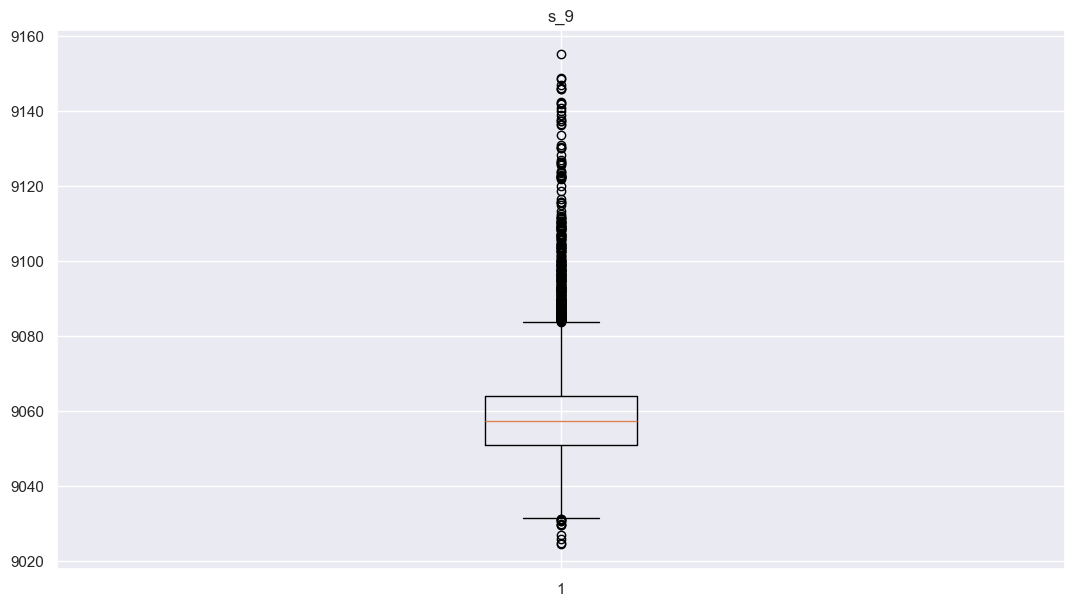

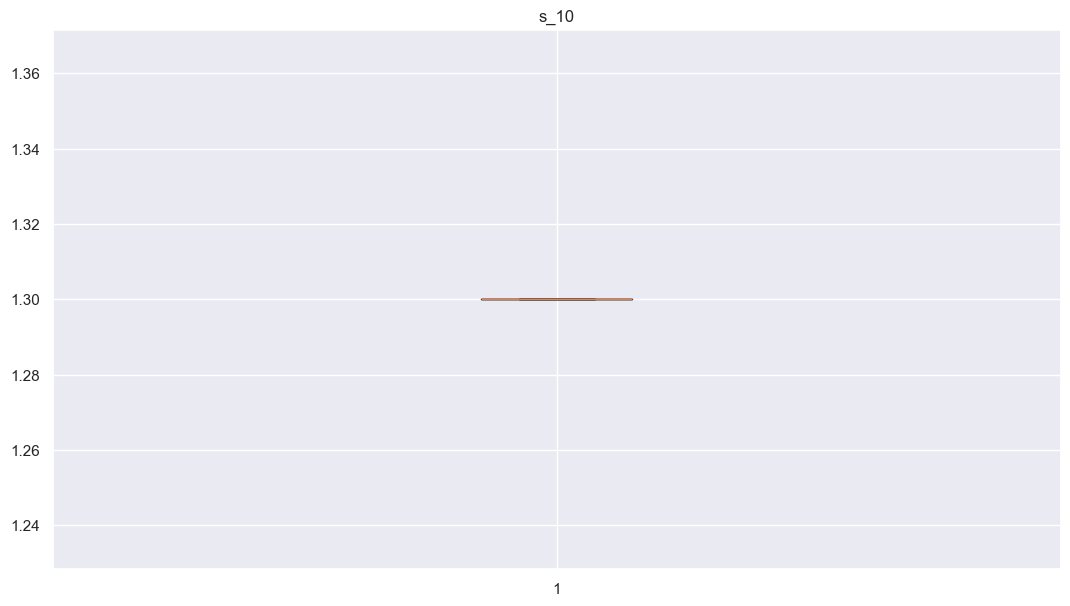

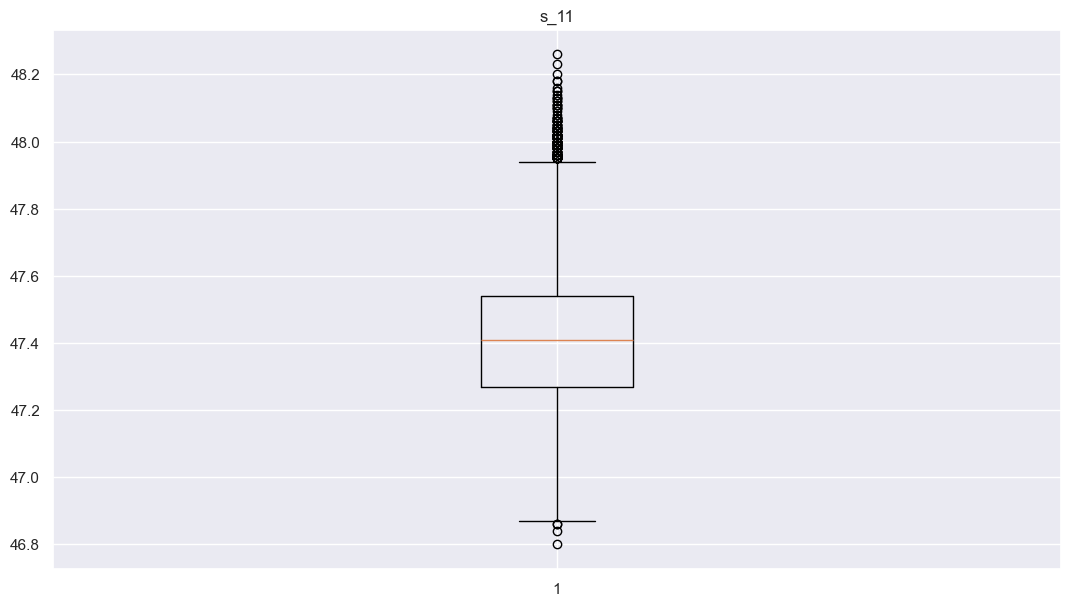

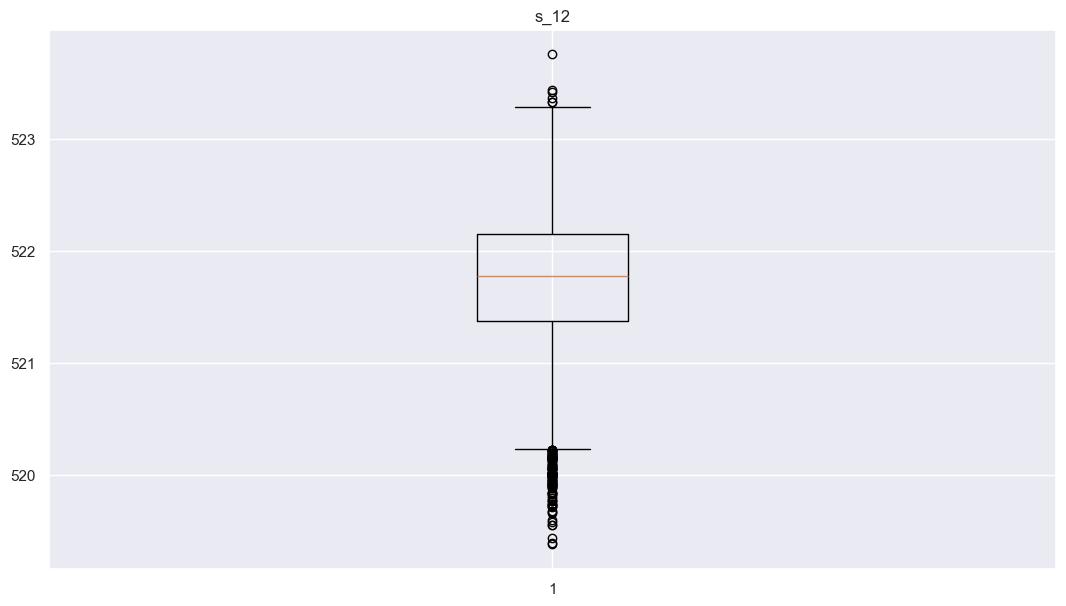

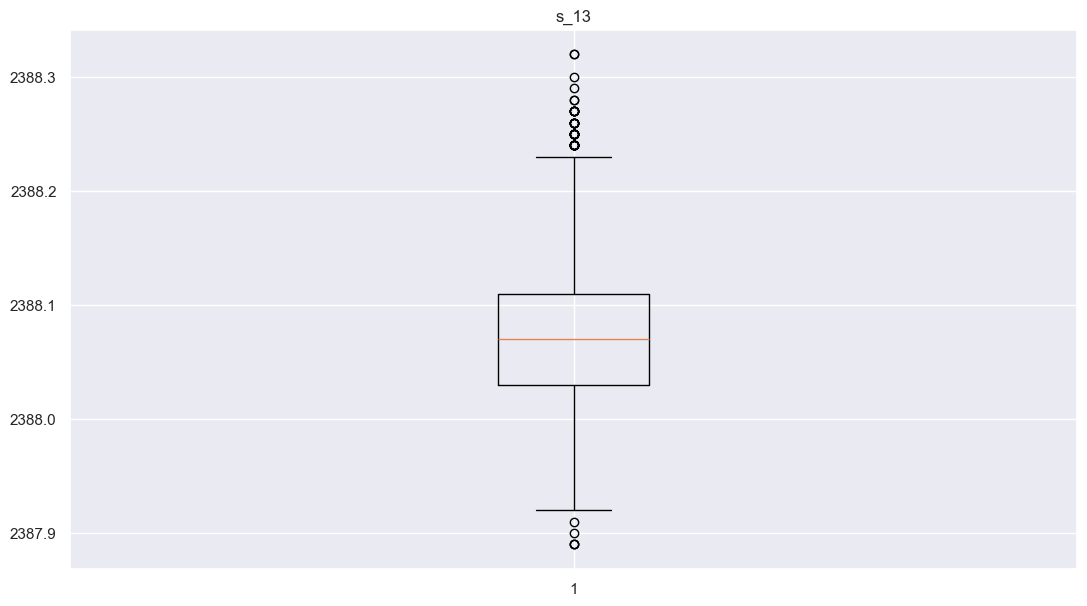

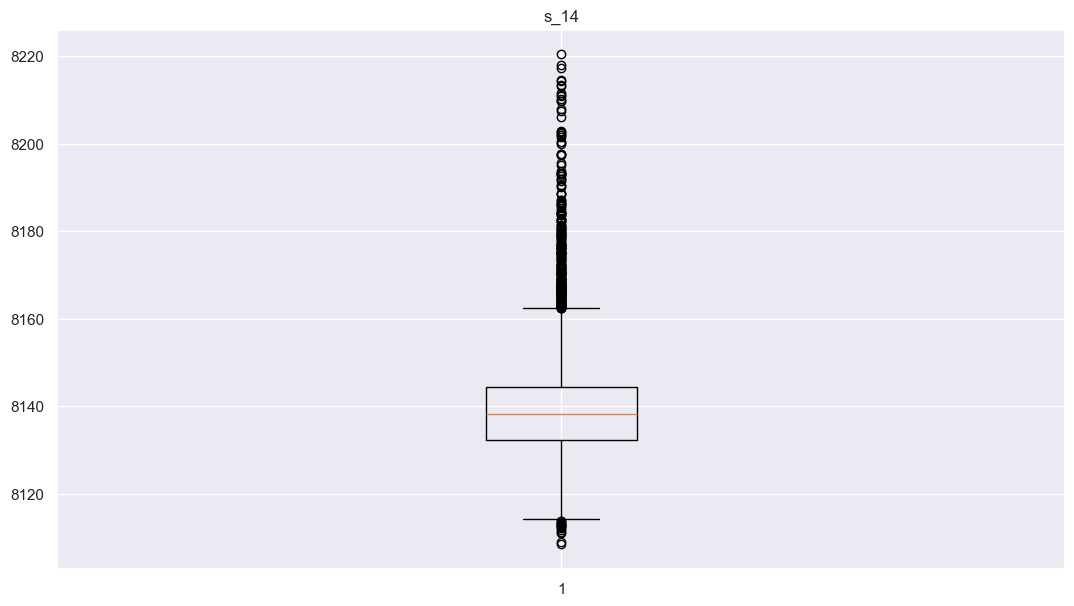

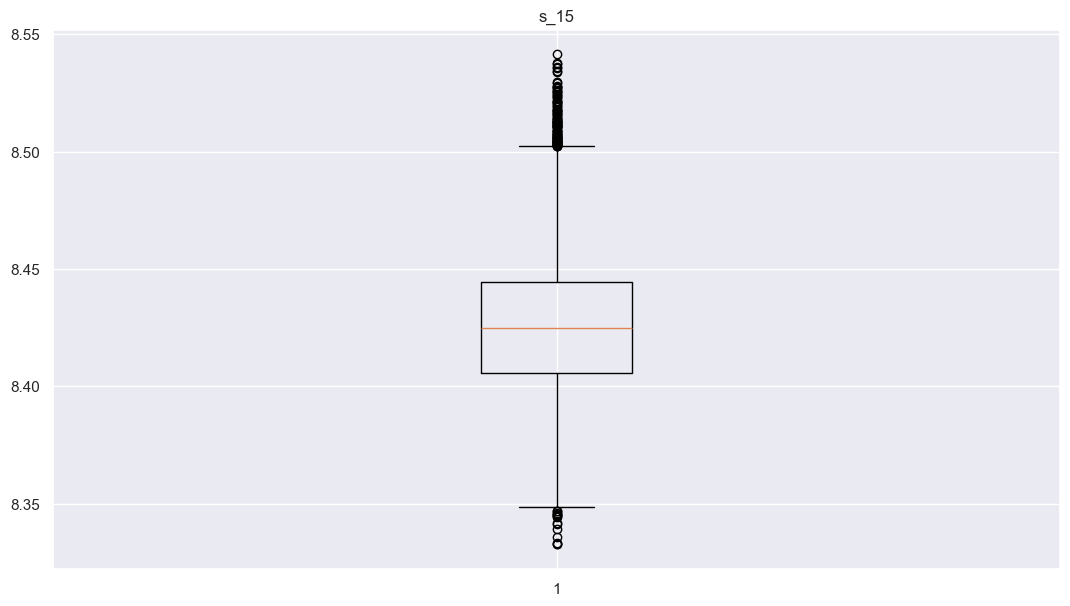

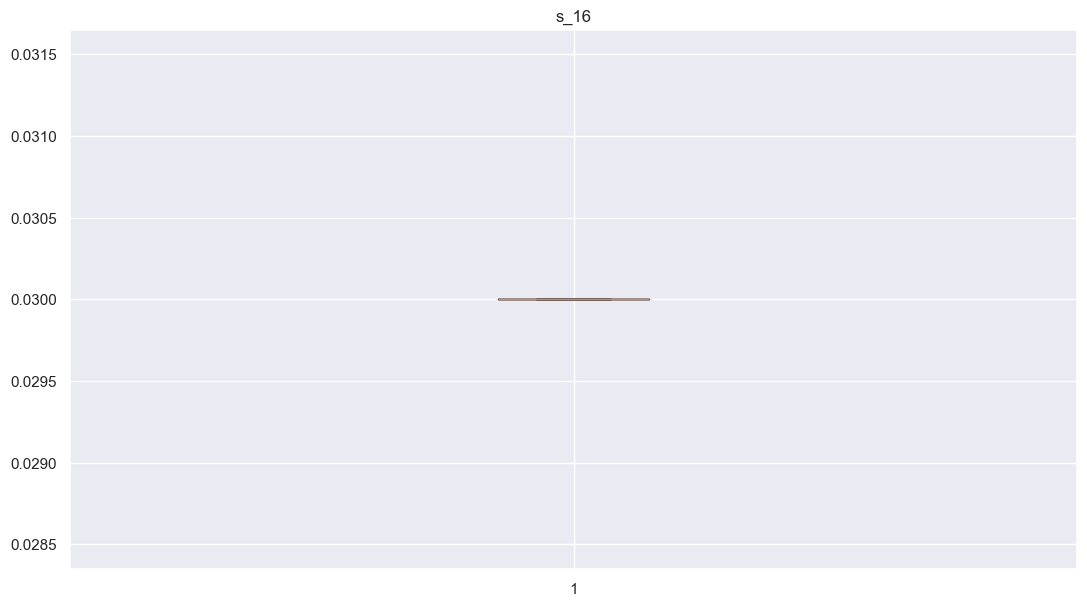

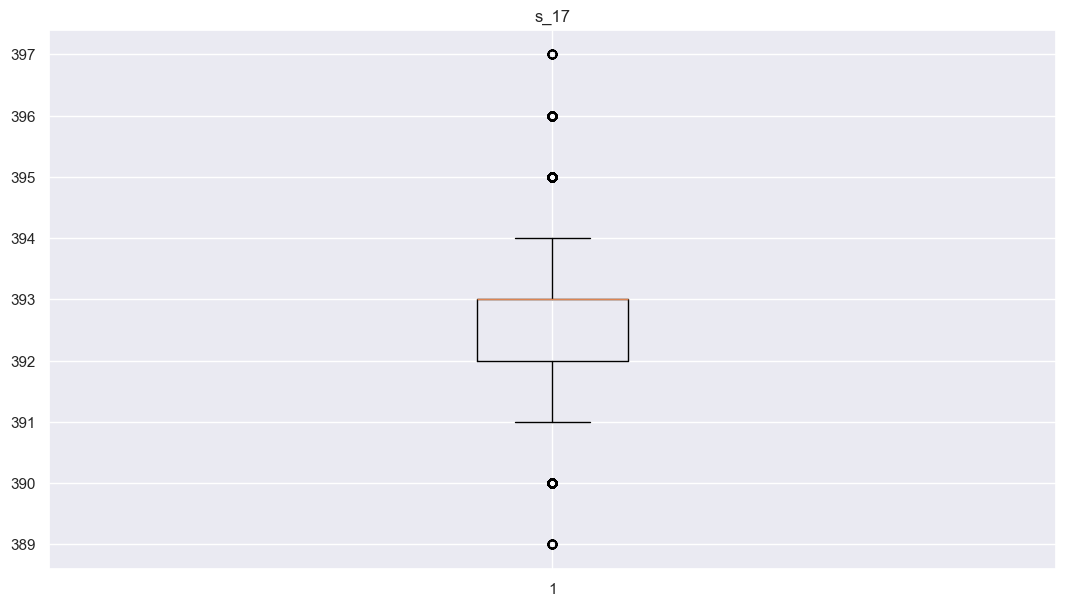

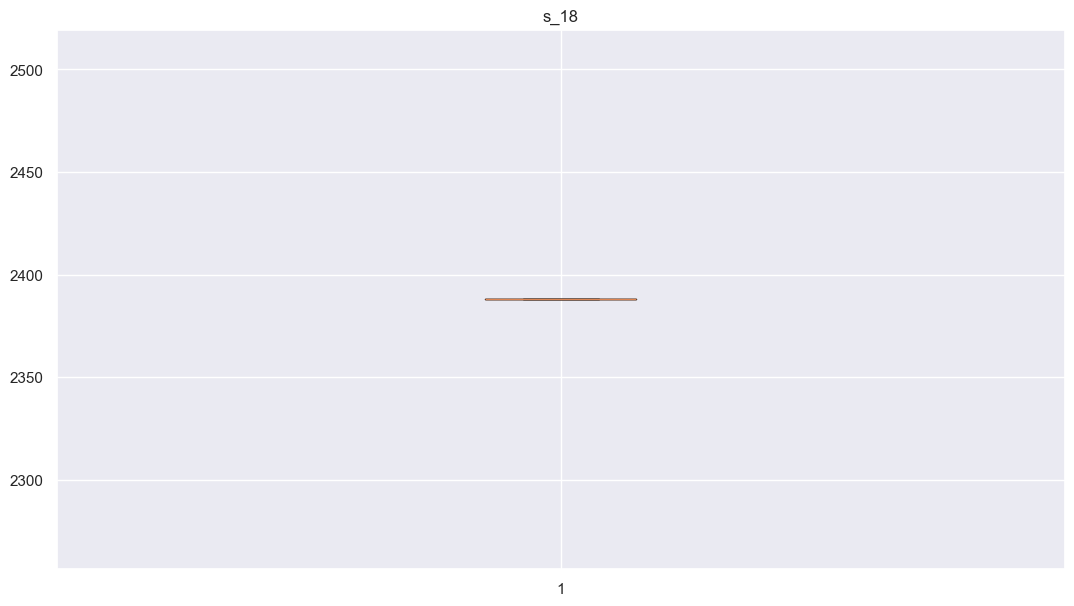

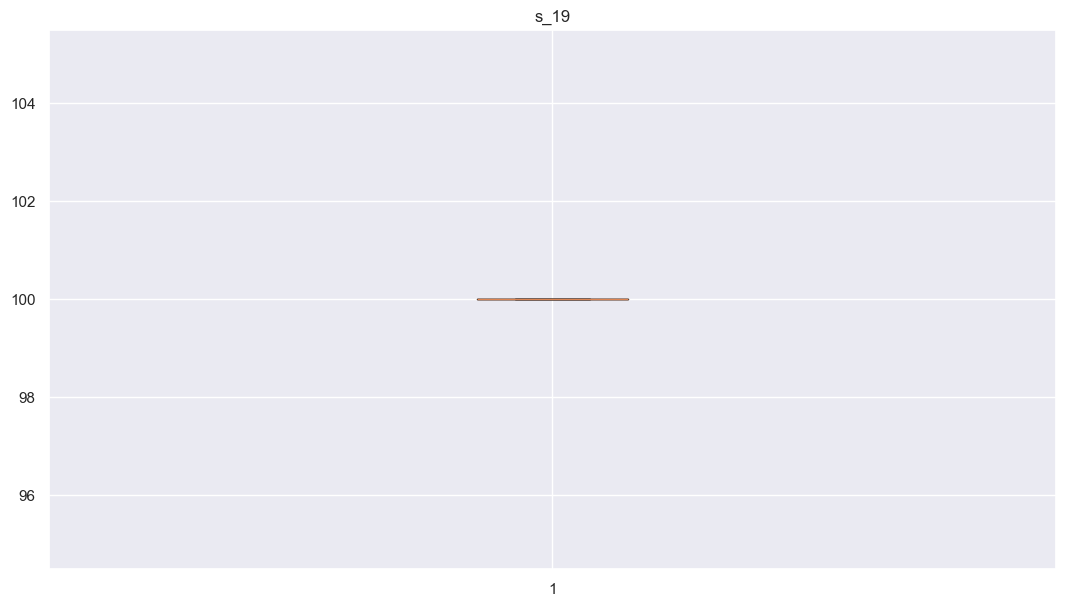

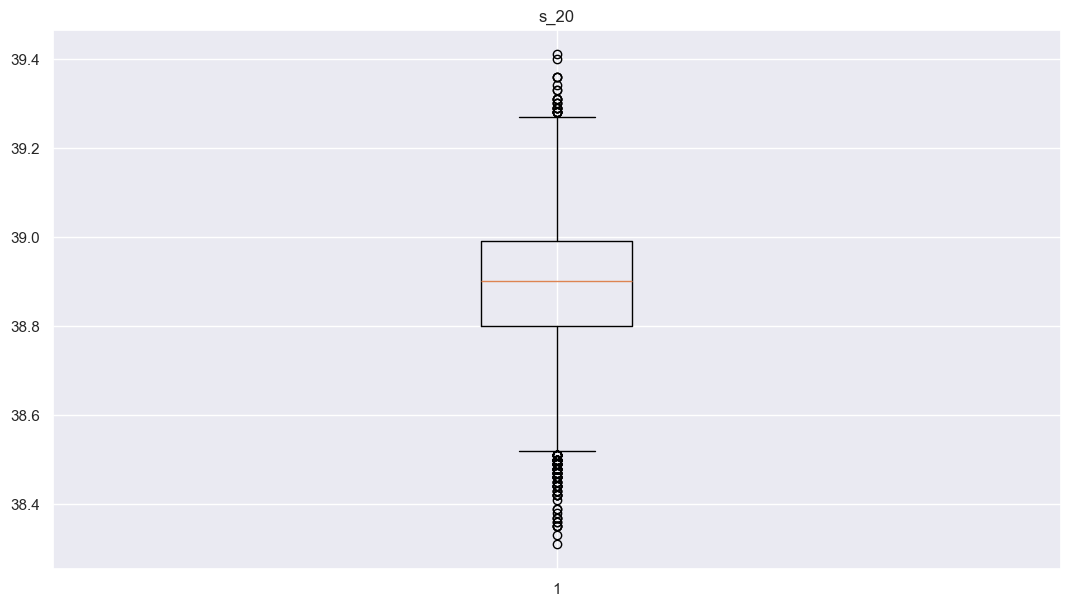

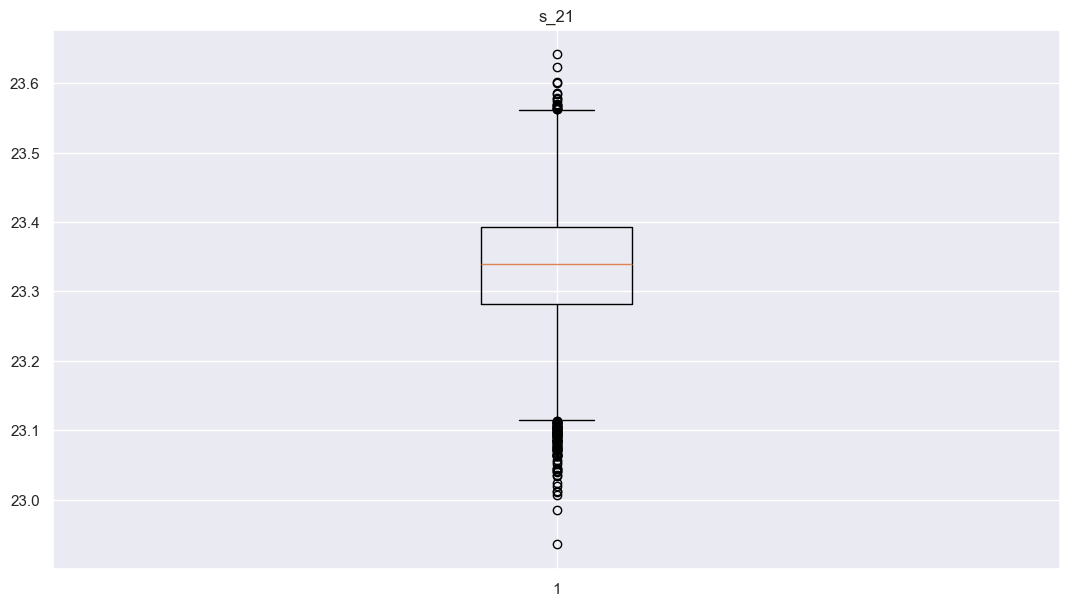

In [ ]:
# Boxplots to check features
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(test[x])
    plt.title(x)
    plt.show()

In [ ]:
# It can be clearly seen that there are features that won't be helpful during the model training.
# Also there are many outliers throughout the data

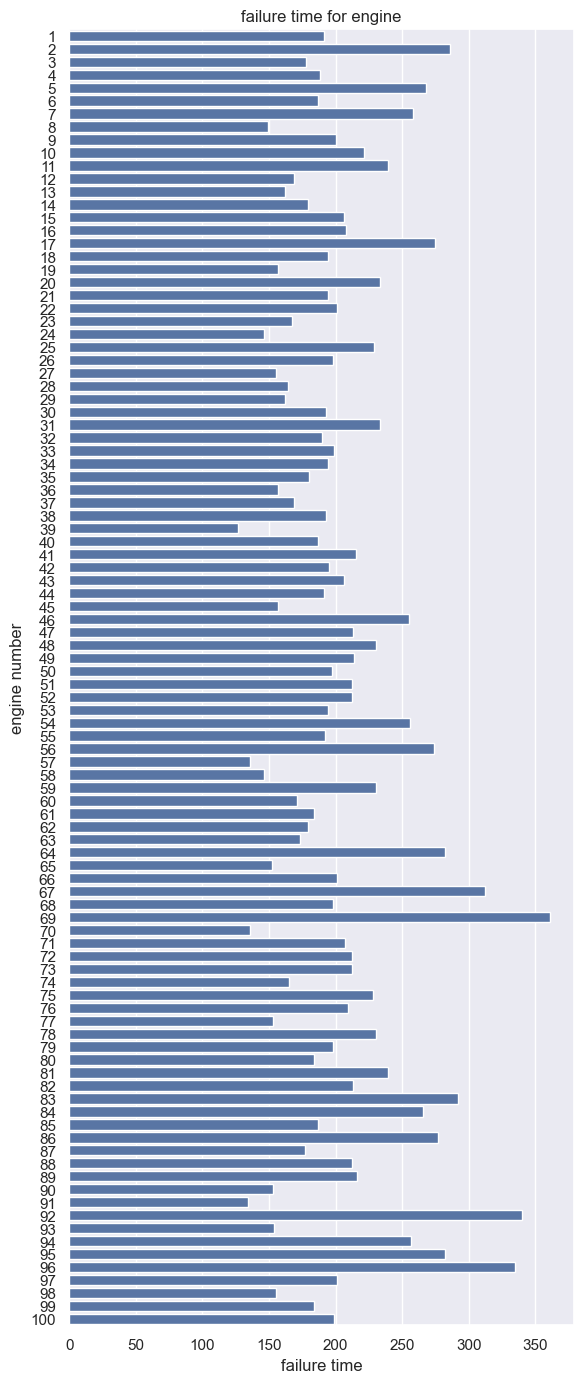

In [27]:
# Calculating failure time for each engine , or max time cycle that engine has worked.
failure_time = train.groupby('unit_nr')['RUL'].max()
plt.figure(figsize = (6,14))
sns.barplot(y = failure_time.index , x = failure_time.values , orient='h')
plt.title('failure time for engine')
plt.xlabel('failure time')
plt.ylabel('engine number')
plt.tight_layout()
plt.show()

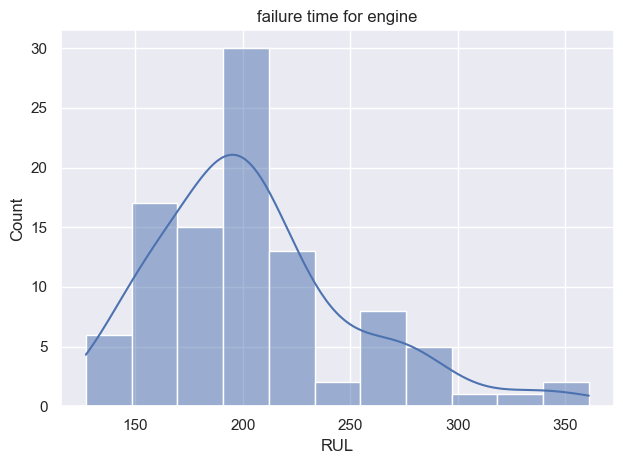

In [28]:
sns.histplot(failure_time , kde=True)
plt.title('failure time for engine')
plt.tight_layout()

In [29]:
# We notice that in most of the time, the maximum time cycles that an engine can achieve is between 190 and 210 before HPC failure.


### LINEAR REGRESSION


In [30]:
# Since the feature expected to be predicted is comtinuous, We decided to go with regression.
# Dropped the features that won't be providing to the model.

drop_sensors = ['s_1','s_5','s_6','s_9','s_10','s_14','s_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [31]:
# Function to evaluate performance metrics:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [32]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:45.61466077800384, R2:0.5614378099126968
test set RMSE:33.30116107019608, R2:0.3578164045373531


Text(0.5, 1.0, 'Actual RUL Vs Predicted RUL for Train Data')

<Figure size 640x480 with 0 Axes>

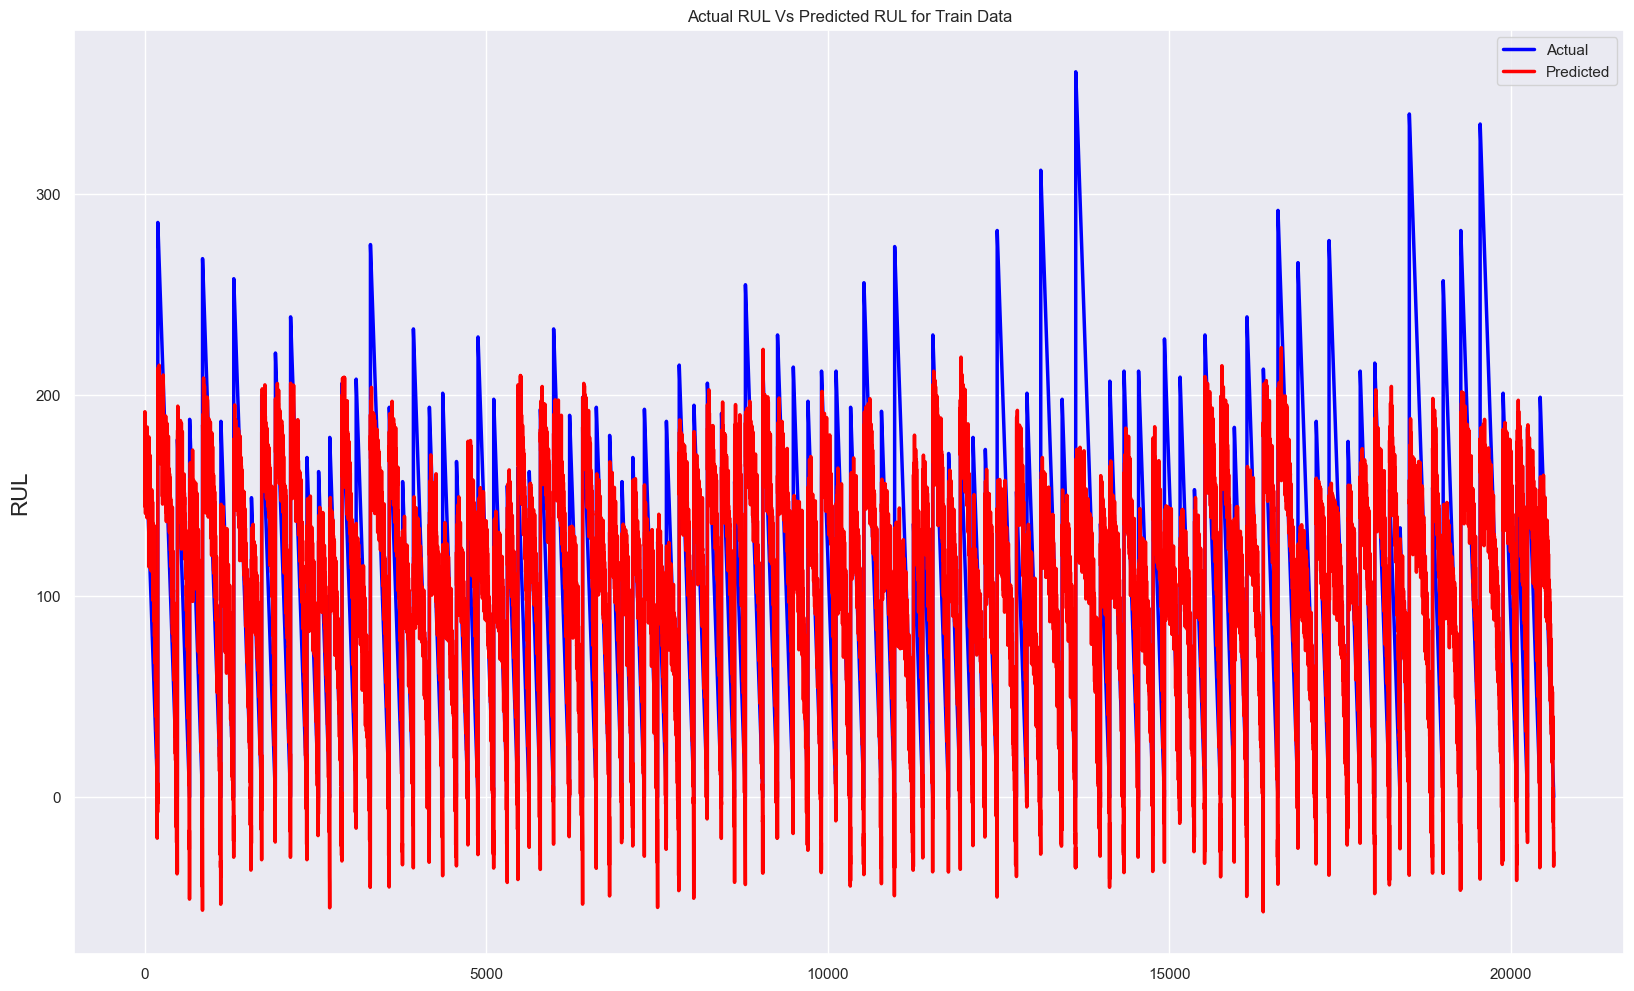

In [ ]:
# Plot Actual Vs Predicted RUL for Train Data
fig = plt.figure();
plt.figure(figsize=[20,12])
plt.plot(y_train,color="blue", linewidth=2.5, linestyle="-",label="Actual")
plt.plot(y_hat_train,color="red",  linewidth=2.5, linestyle="-",label="Predicted")
fig.suptitle('Actual and Predicted', fontsize=20)            # Plot heading 
plt.xlabel('Index', fontsize=18)                            # X-label
plt.ylabel('RUL', fontsize=16)                               # Y-label
plt.legend()
plt.title("Actual RUL Vs Predicted RUL for Train Data")

Text(0.5, 1.0, 'Actual RUL Vs Predicted RUL for Test Data')

<Figure size 640x480 with 0 Axes>

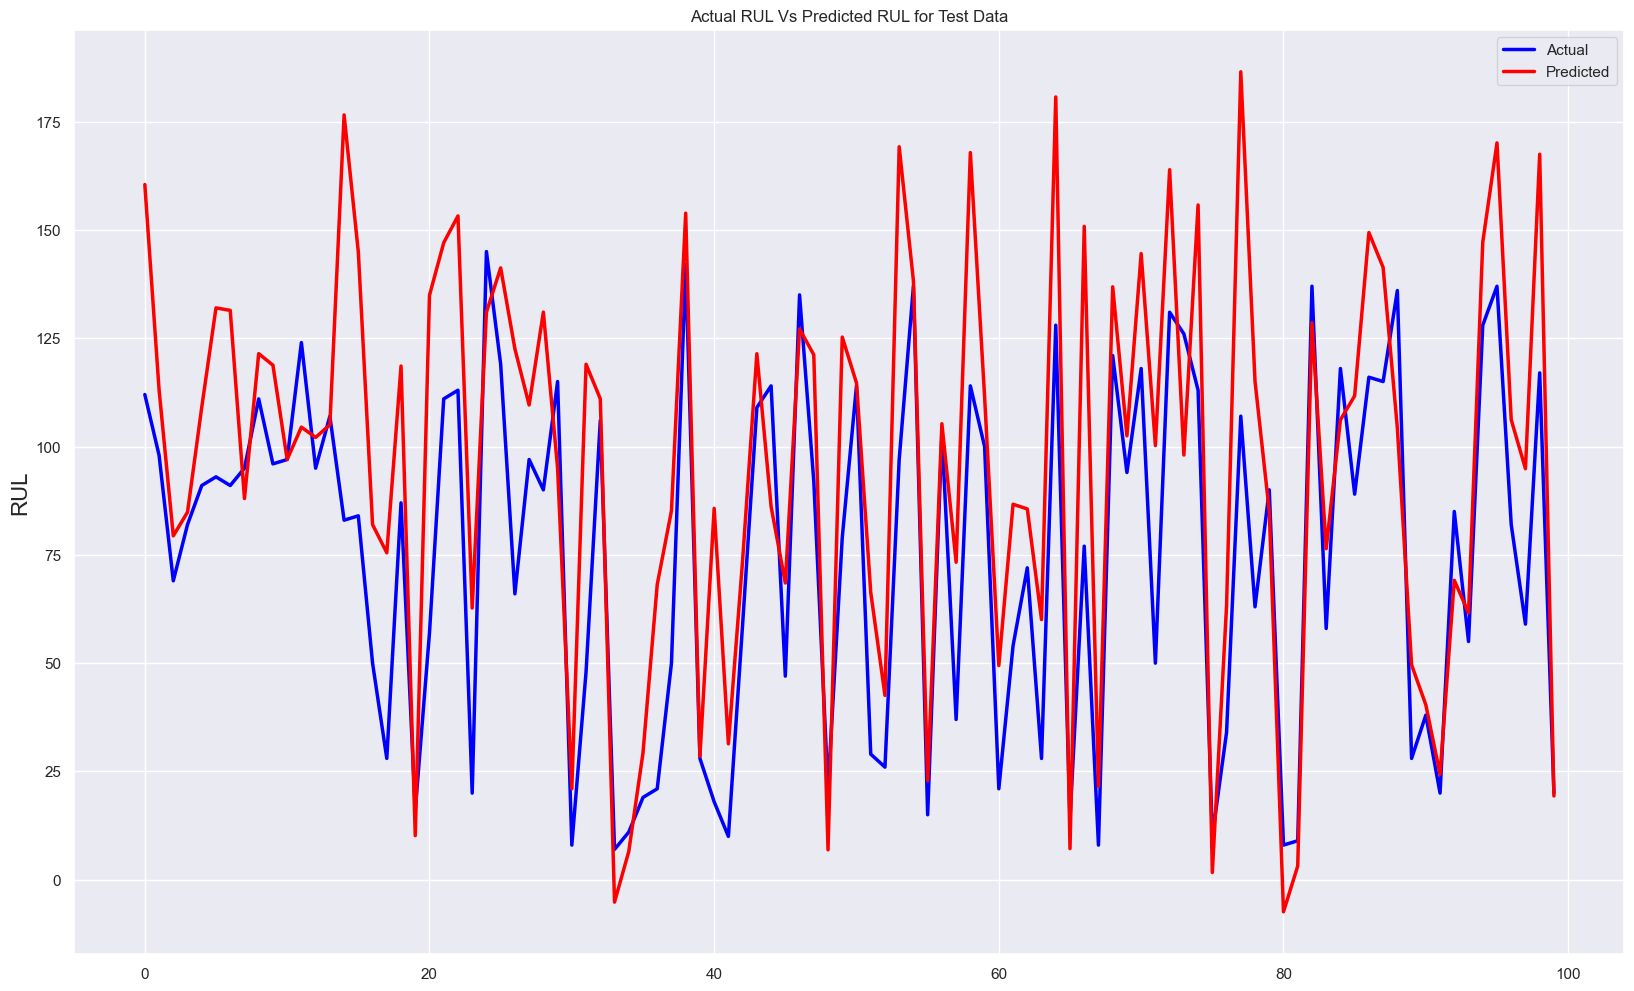

In [ ]:
# Plot Actual Vs Predicted RUL for Test Data
fig = plt.figure();
plt.figure(figsize=[20,12])
plt.plot(y_test,color="blue", linewidth=2.5, linestyle="-",label="Actual")
plt.plot(y_hat_test,color="red",  linewidth=2.5, linestyle="-",label="Predicted")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('RUL', fontsize=16)                               # Y-label
plt.legend()
plt.title("Actual RUL Vs Predicted RUL for Test Data")

In [ ]:
# Training SVR Model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
# predict and evaluate
y_hat_train1 = regressor.predict(X_train)
evaluate(y_train, y_hat_train1,'train')
y_hat_test1 = regressor.predict(X_test)
evaluate(y_test, y_hat_test1)



train set RMSE:68.86043725730862, R2:0.0005482328921405655
test set RMSE:49.42460946542992, R2:-0.4145781597002258


Text(0.5, 1.0, 'Actual RUL Vs Predicted RUL for Test Data')

<Figure size 640x480 with 0 Axes>

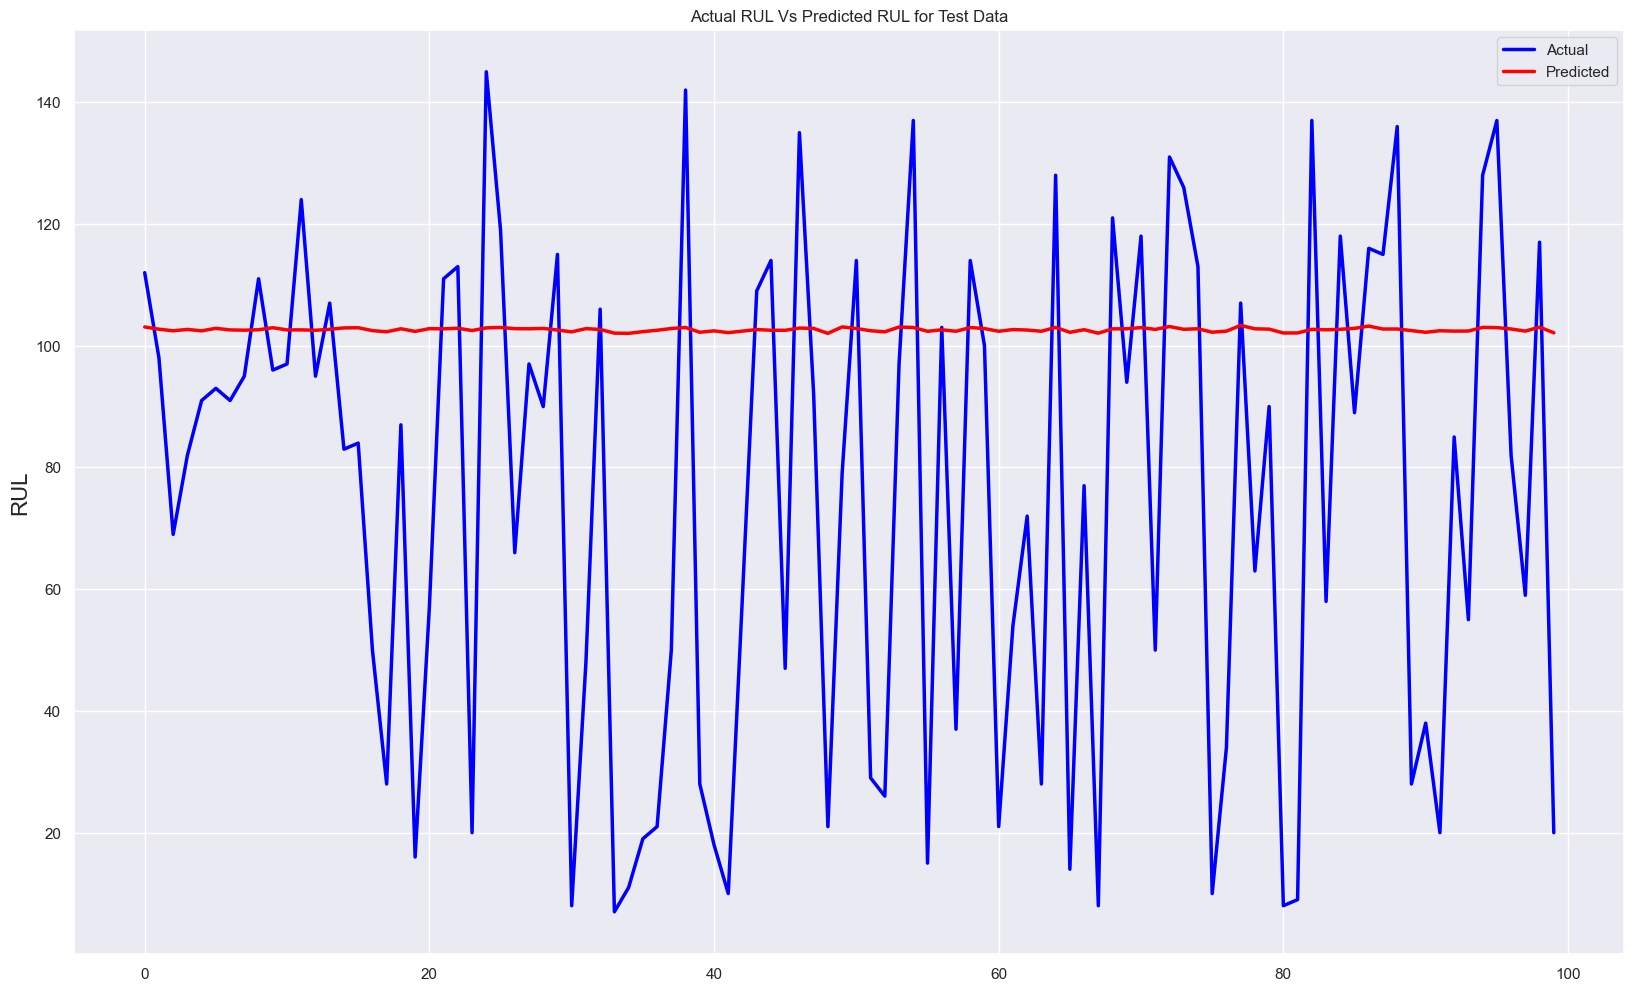

In [ ]:
fig = plt.figure();
plt.figure(figsize=[20,12])
plt.plot(y_test,color="blue", linewidth=2.5, linestyle="-",label="Actual")
plt.plot(y_hat_test1,color="red",  linewidth=2.5, linestyle="-",label="Predicted")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('RUL', fontsize=16)                               # Y-label
plt.legend()
plt.title("Actual RUL Vs Predicted RUL for Test Data")

In [ ]:
## SVR did not improve the output. 